# Unsupervised Learning : Hierarchical Clustering

## Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi']=250
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv",index_col=0)
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
df.rename(columns = {'Genre':'Gender','Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score '},inplace=True)
df

,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
df['Gender']= df['Gender'].map({'Male': 0 ,'Female':1})
df

,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40
...,...,...,...,...
196,1,35,120,79
197,1,45,126,28
198,0,32,126,74


In [5]:
df.describe()

,Gender,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           200 non-null    int64
 1   Age              200 non-null    int64
 2   Annual Income    200 non-null    int64
 3   Spending Score   200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


In [7]:
df.isnull().sum()

Gender             0
Age                0
Annual Income      0
Spending Score     0
dtype: int64

In [8]:
df.duplicated().sum()

0

<Axes: >

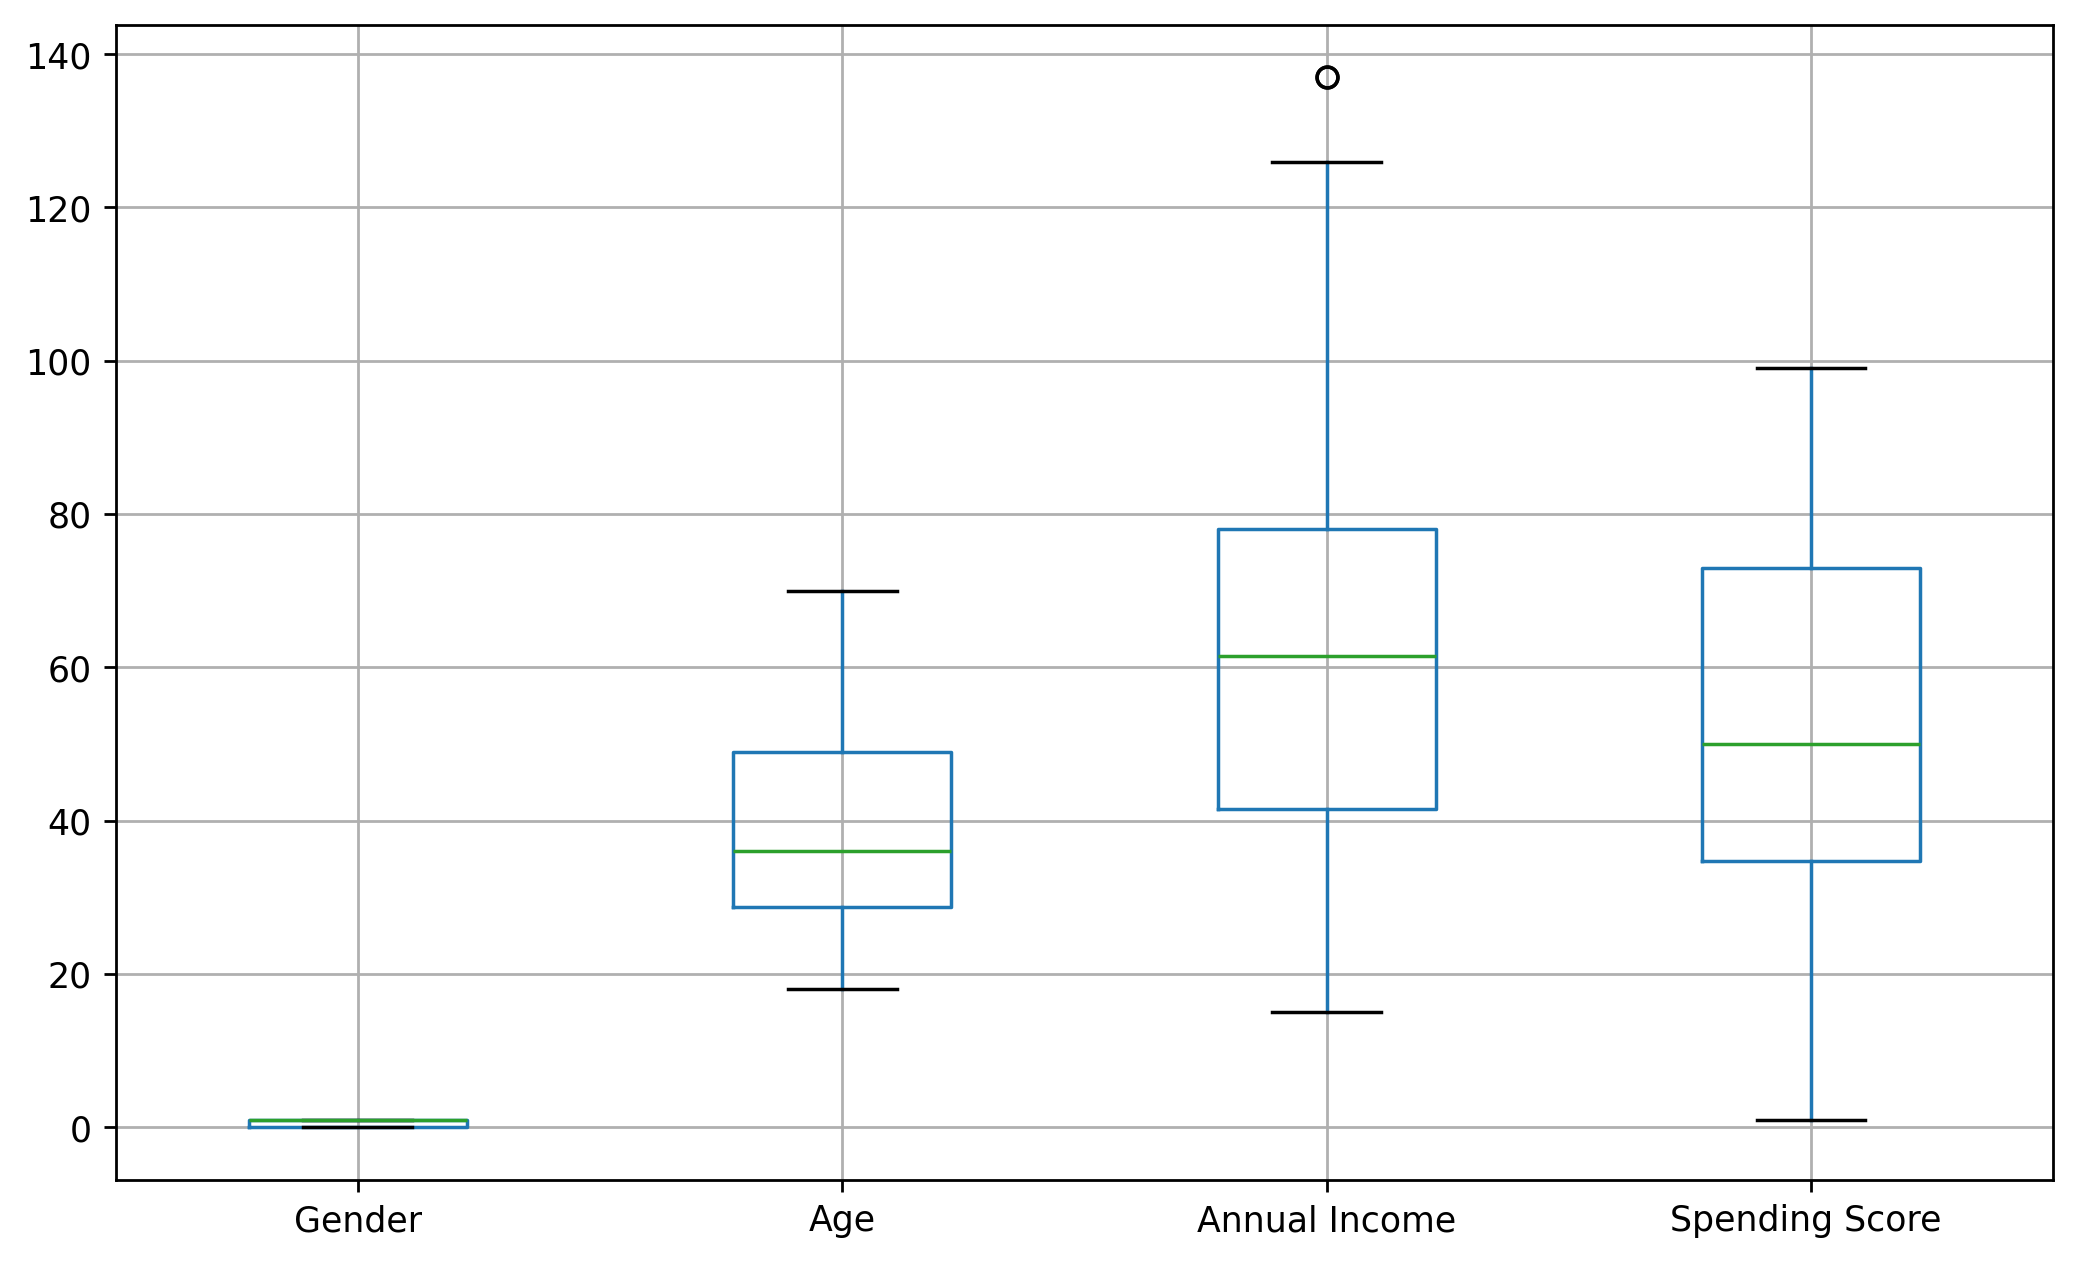

In [9]:
df.boxplot()

In [10]:
def capping(data,columns):
    for col in columns:
        q1=data[col].quantile(0.25)
        q3=data[col].quantile(0.75)
        iqr=q3-q1
        lower=q1-(1.5*iqr)
        upper=q3+(1.5*iqr)
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))

In [11]:
capping(df,["Annual Income"])

<Axes: >

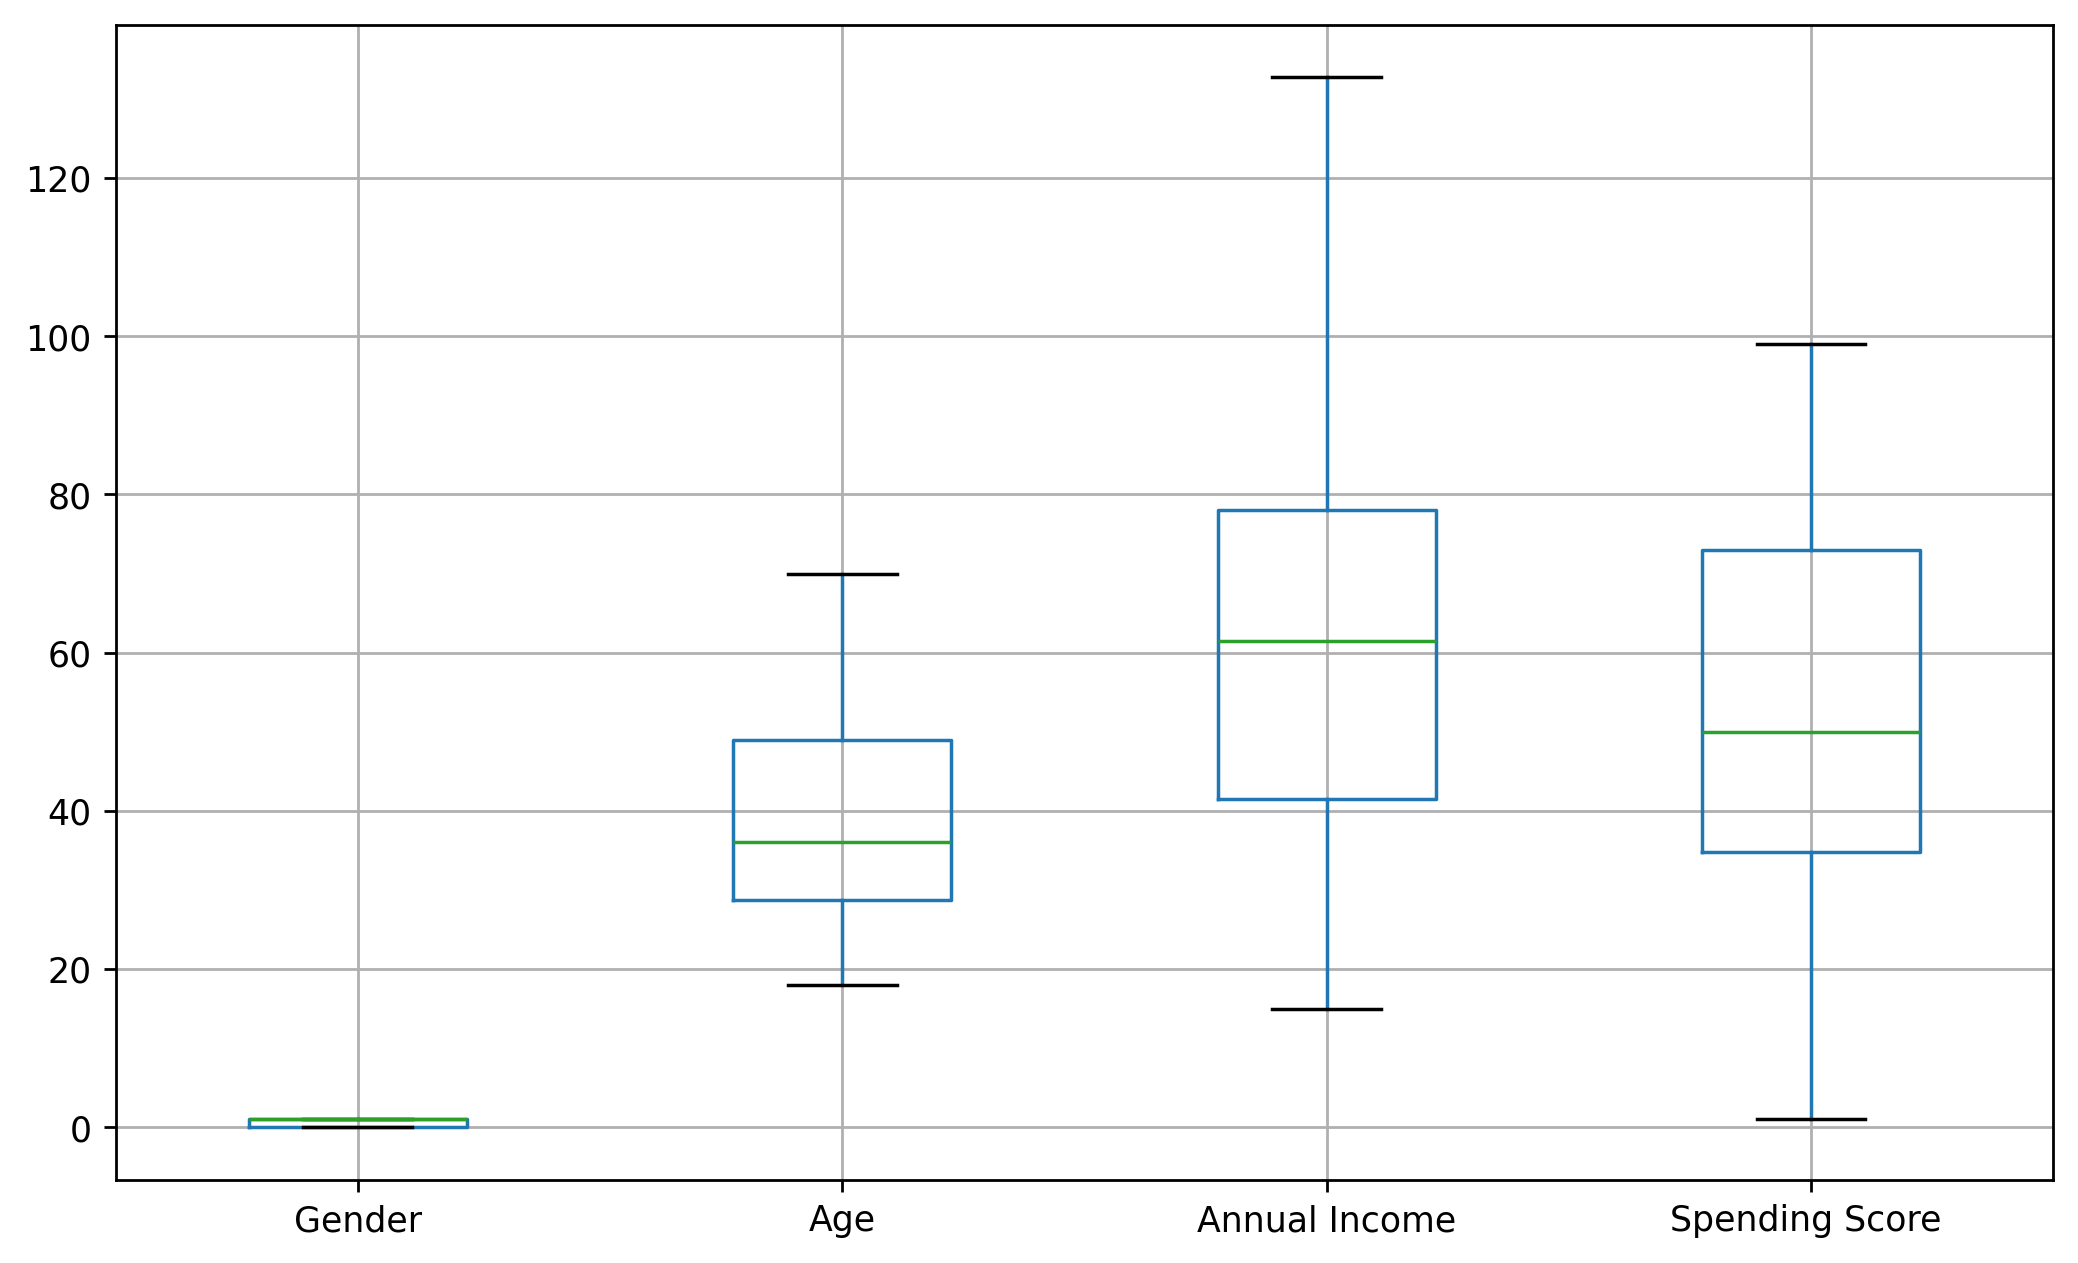

In [12]:
df.boxplot()


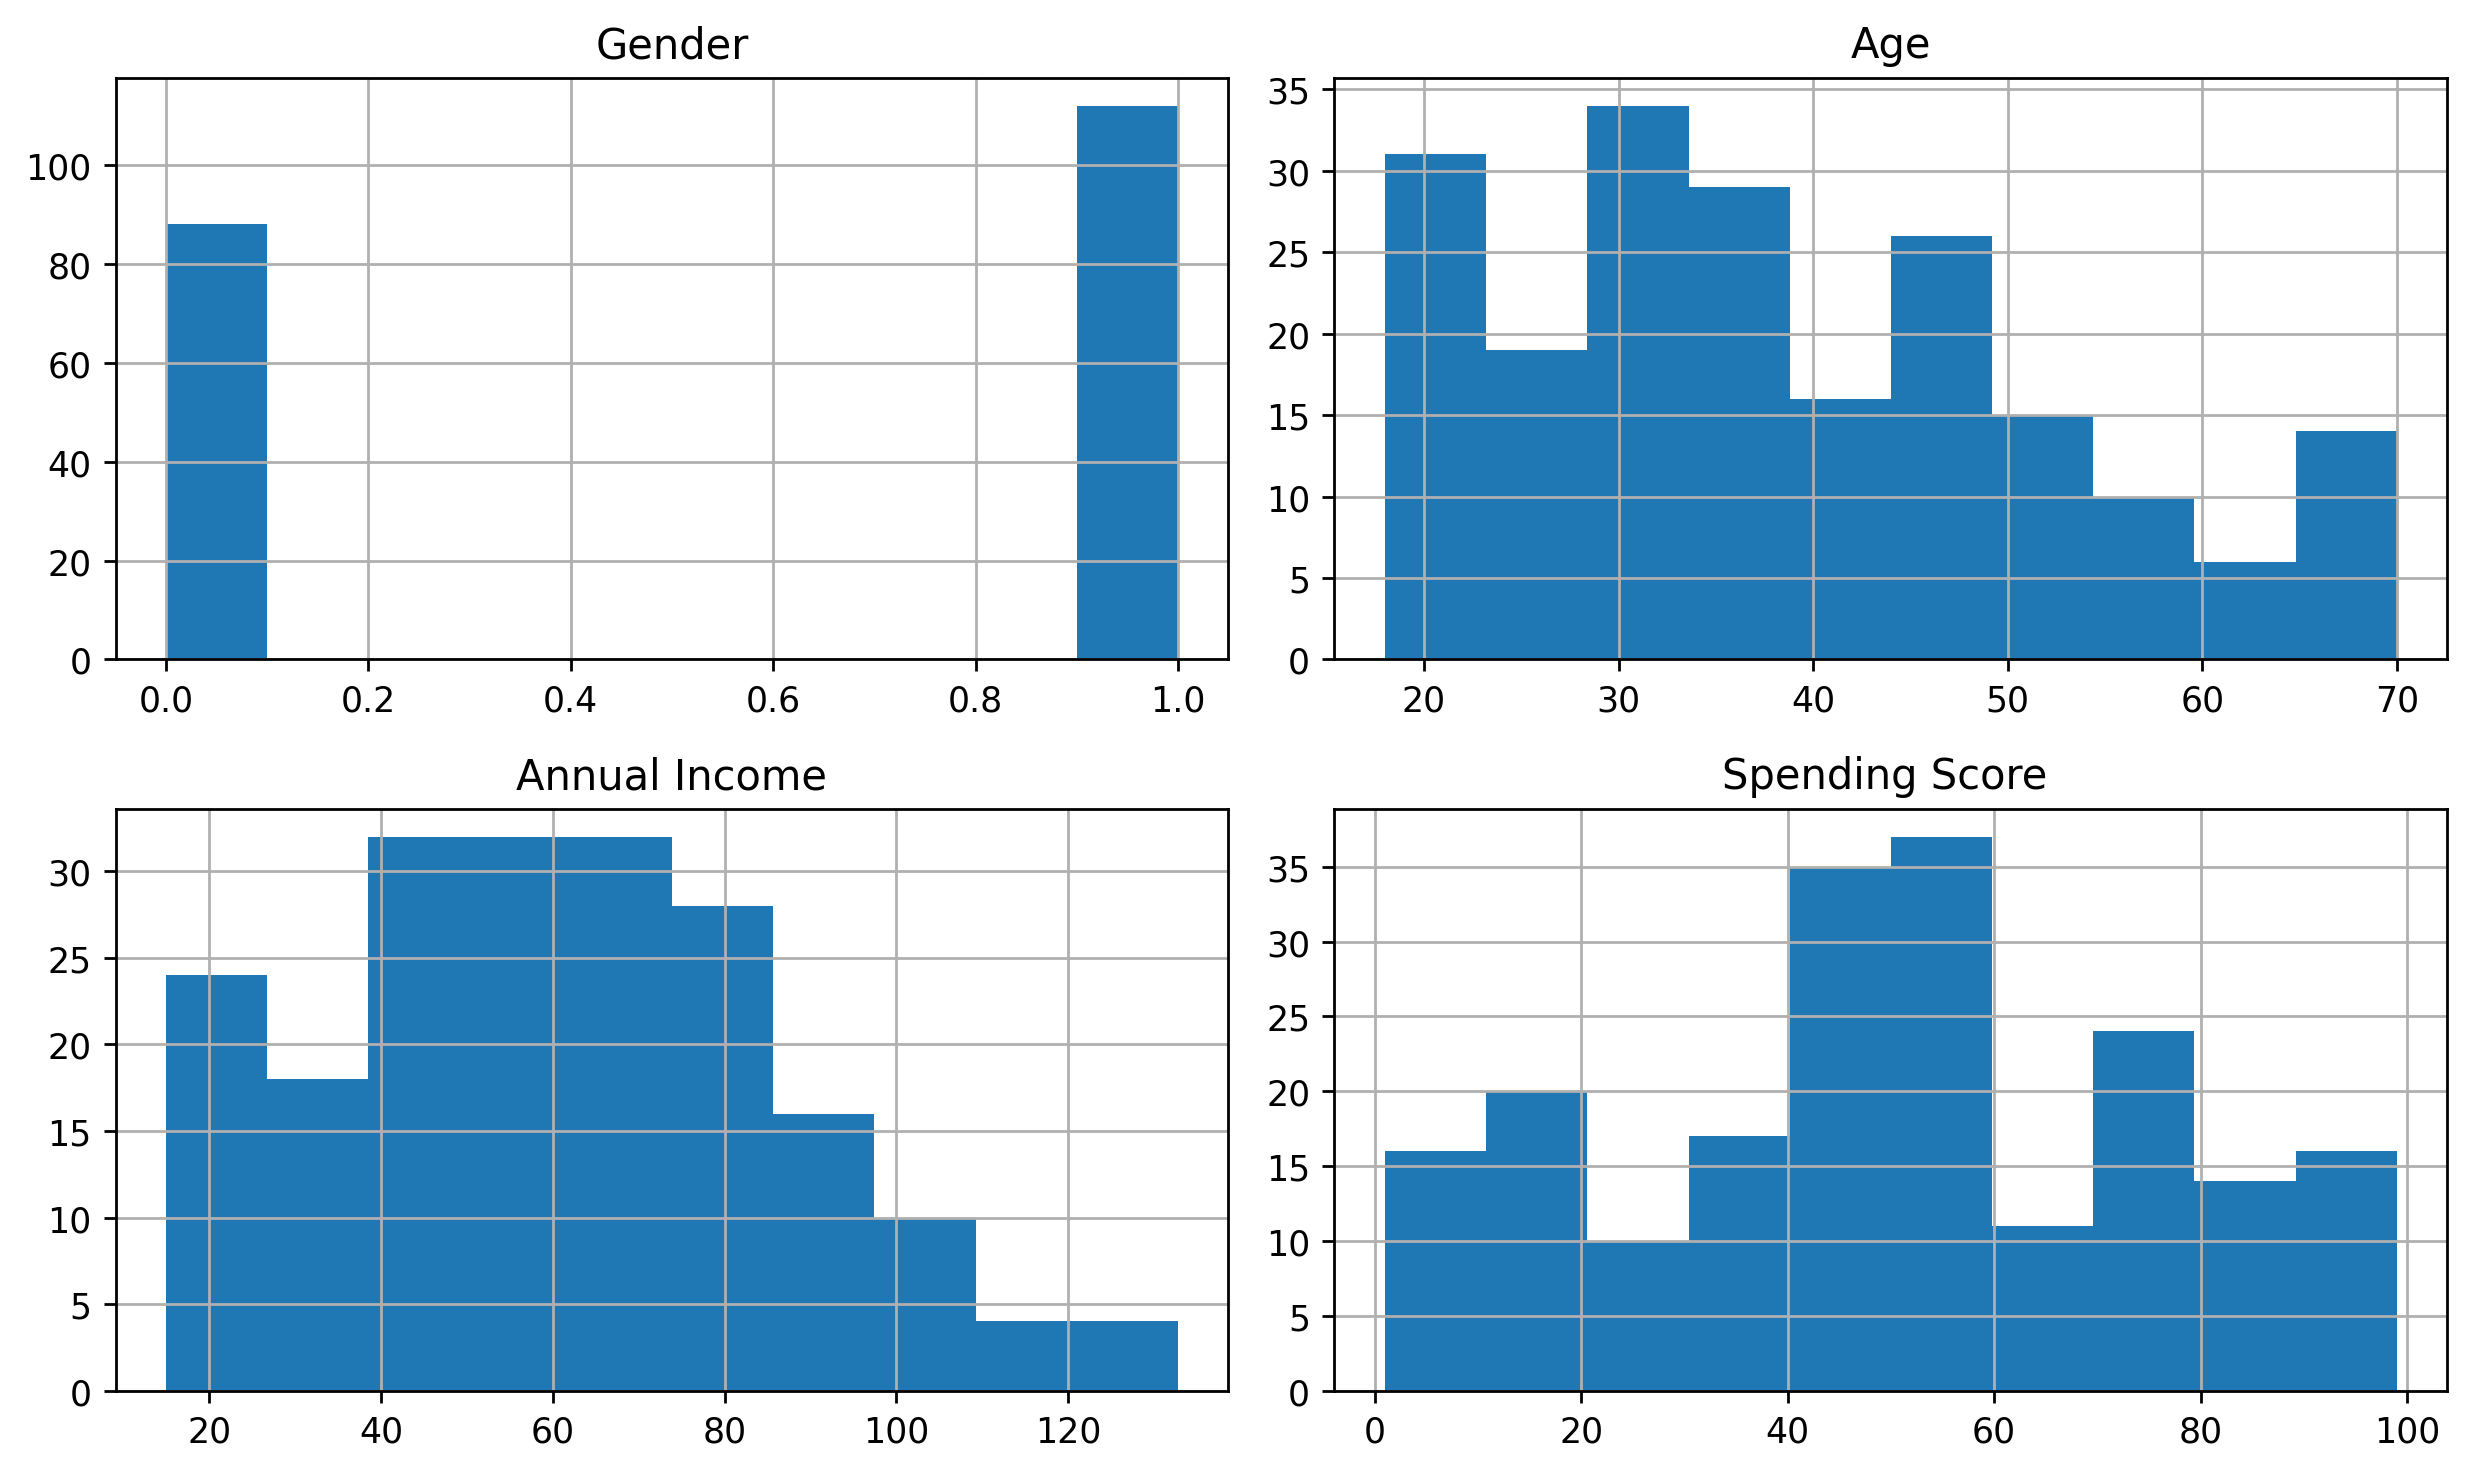

In [13]:
df.hist()
plt.tight_layout()

In [18]:
sc = StandardScaler()
df[['Age', 'Annual Income', 'Spending Score ']] = sc.fit_transform(df[['Age', 'Annual Income', 'Spending Score ']])
df

,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
1,0,-1.424569,-1.745429,-0.434801
2,0,-1.281035,-1.745429,1.195704
3,1,-1.352802,-1.707083,-1.715913
4,1,-1.137502,-1.707083,1.040418
5,1,-0.563369,-1.668737,-0.395980
...,...,...,...,...
196,1,-0.276302,2.280936,1.118061
197,1,0.441365,2.511014,-0.861839
198,0,-0.491602,2.511014,0.923953


## Dendrogram 

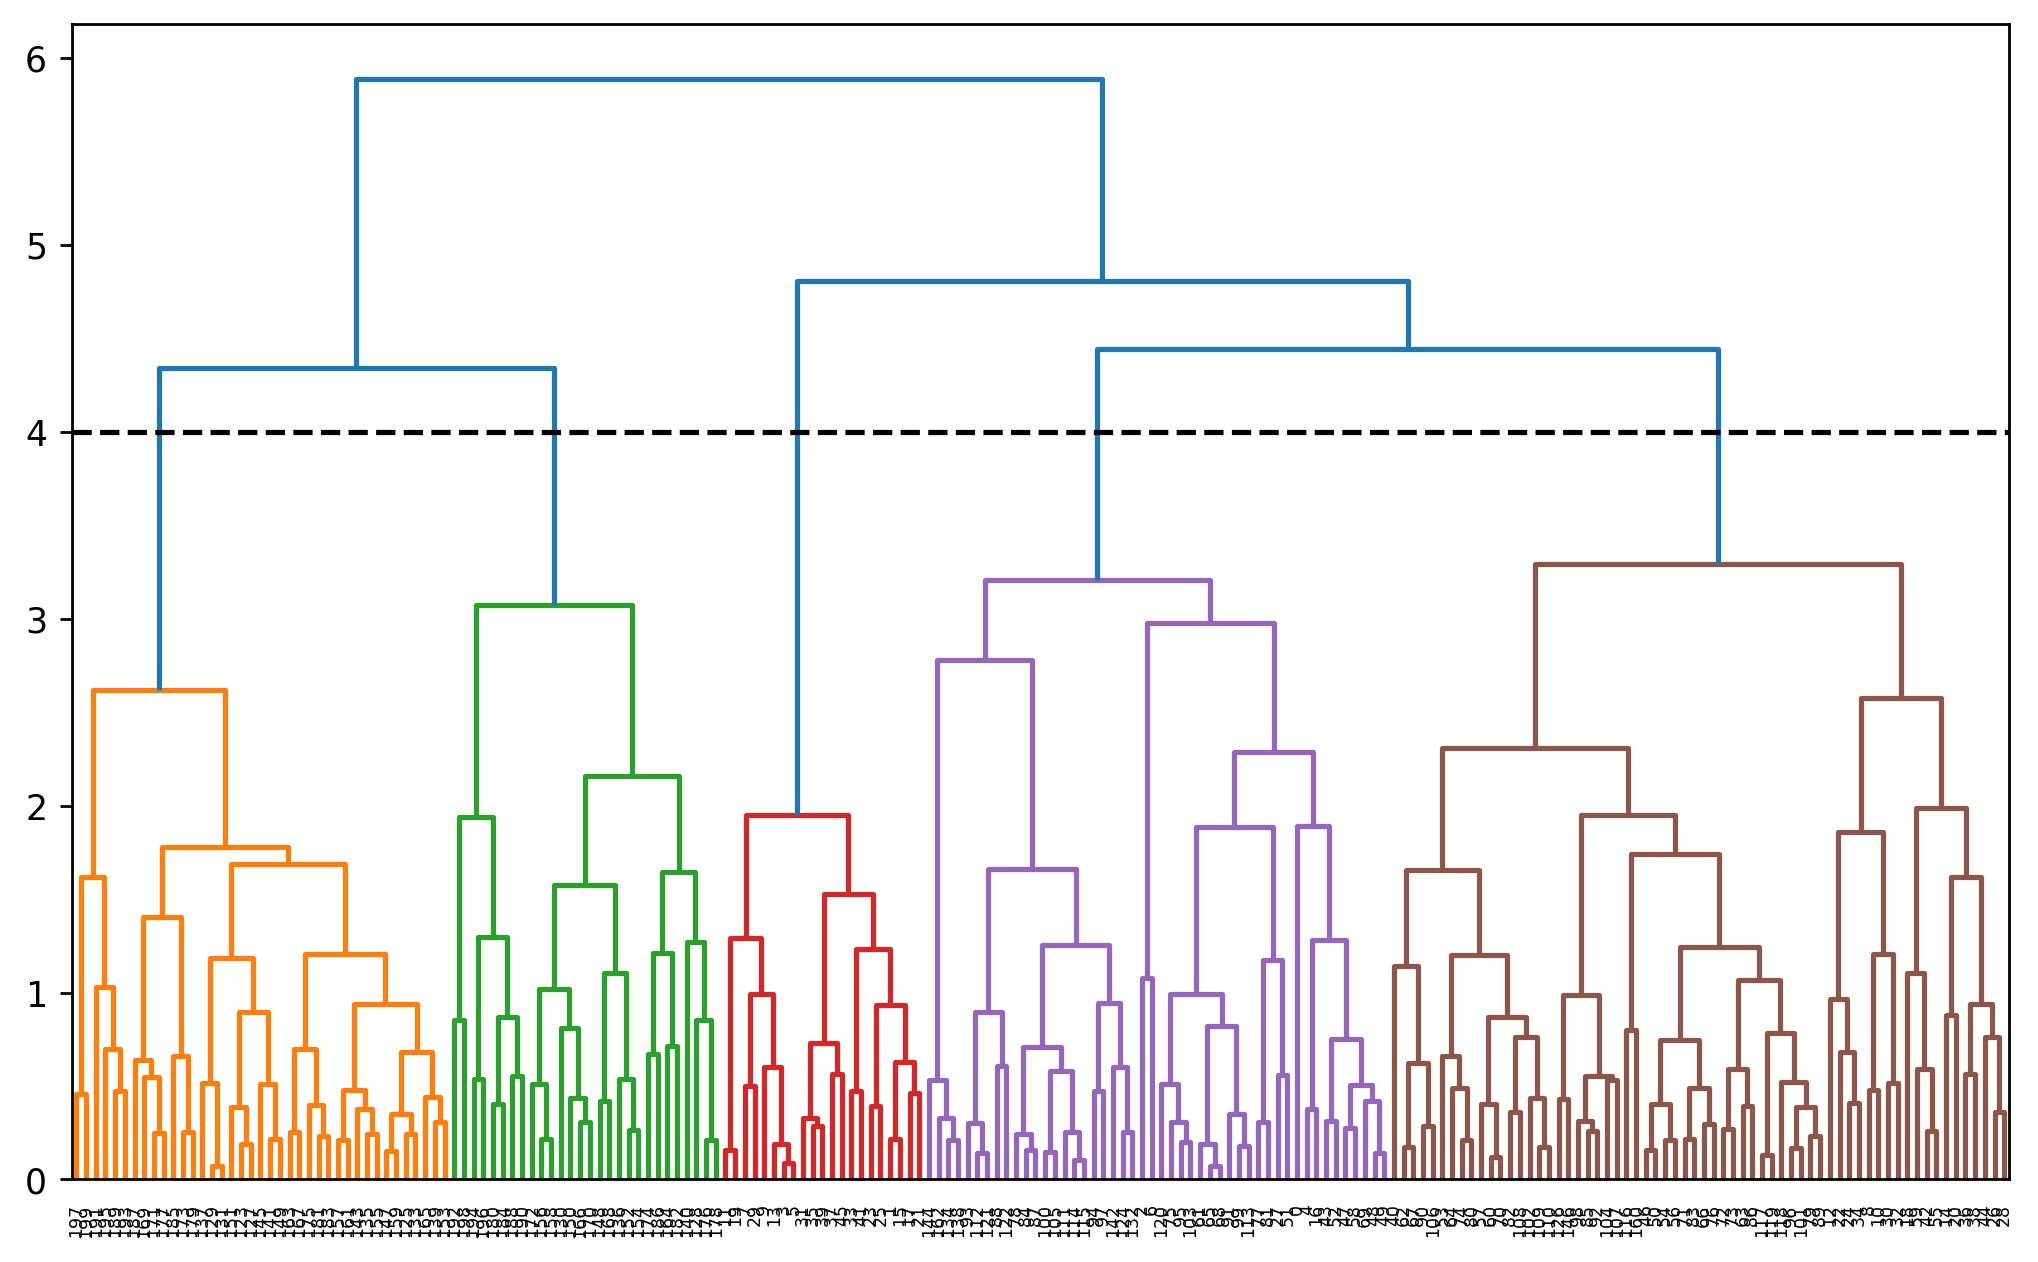

In [24]:
link = hierarchy.linkage(df,method='complete')
dend = hierarchy.dendrogram(link)
plt.axhline(y=4,color ='black',linestyle='--')

## Model Building

In [27]:
hc = AgglomerativeClustering(n_clusters=5)
ypred = hc.fit_predict(df)

In [28]:
df['Cluster']=ypred
df

,Gender,Age,Annual Income,Spending Score,Cluster
CustomerID,,,,,
1,0,-1.424569,-1.745429,-0.434801,4
2,0,-1.281035,-1.745429,1.195704,0
3,1,-1.352802,-1.707083,-1.715913,4
4,1,-1.137502,-1.707083,1.040418,0
5,1,-0.563369,-1.668737,-0.395980,4
...,...,...,...,...,...
196,1,-0.276302,2.280936,1.118061,3
197,1,0.441365,2.511014,-0.861839,2
198,0,-0.491602,2.511014,0.923953,3
